In [80]:
import pandas as pd
import numpy as np

In [84]:
data = pd.read_csv("data_presiden2024.csv")
data.head(10)

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2024-10-25T07:39:27Z,@IstiqomahIstiqomah-t6t,Mosok presiden disuruh berdiri sendirian disitu,0.0
1,2024-10-25T05:01:11Z,@yayormay-z5p,masih ketar ketir liat fufufafa dilantikkk😢 <a...,0.0
2,2024-10-25T04:12:10Z,@riniramadhanty,Prabowo bener2 ngajarin apa itu proses dan key...,0.0
3,2024-10-25T03:50:41Z,@yudhianto11,"<a href=""https://www.youtube.com/watch?v=0LYmM...",0.0
4,2024-10-25T03:38:32Z,@yudhianto11,"<a href=""https://www.youtube.com/watch?v=0LYmM...",0.0
5,2024-10-25T03:32:15Z,@ClineGames,"<a href=""https://www.youtube.com/watch?v=0LYmM...",0.0
6,2024-10-25T02:01:12Z,@abiyures2703,Mantap pak semoga tercapai,0.0
7,2024-10-25T01:54:32Z,@abiyures2703,Perjuangan pak Prabowo sangatlah thebest 😢😢😢😢😢,0.0
8,2024-10-25T01:11:36Z,@YantoRustandi-vp3hk,❤,0.0
9,2024-10-24T22:09:53Z,@madinamarsha1838,Kok gak ada perwakilan dari Banteng merah😅,0.0


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   publishedAt        1487 non-null   object 
 1   authorDisplayName  1483 non-null   object 
 2   textDisplay        1482 non-null   object 
 3   likeCount          1481 non-null   float64
dtypes: float64(1), object(3)
memory usage: 46.6+ KB


In [86]:
data.isna().sum()

publishedAt          0
authorDisplayName    4
textDisplay          5
likeCount            6
dtype: int64

In [87]:
data = data.dropna()
data.isna().sum()

publishedAt          0
authorDisplayName    0
textDisplay          0
likeCount            0
dtype: int64

In [88]:
import re
import string
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookdanda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookdanda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
import re

# Data Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Hilangkan URL
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Hilangkan karakter khusus
    return text


data['text_clean'] = data['textDisplay'].apply(clean_text)

In [90]:
# def cleaningText(text):
#     text = re.sub(r'@[A-Za-z0-9]+', '', text)
#     text = re.sub(r'#[A-Za-z0-9]+', '', text)
#     text = re.sub(r'RT[\s]', '', text)
#     text = re.sub(r'http\S+', '', text)
#     text = re.sub(r'[0-9]+', '', text)
    
#     text = text.replace('\n', '')
#     text = text.strip(' ')
#     return text


def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
            
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [91]:
def threeLetterormore(text):
    text = re.sub(r'([a-zA-Z])\1\1','\\1', text)
    return text

In [92]:
data['text_clean'] = data ['text_clean'].apply(threeLetterormore)
data['text_clean'] = data['text_clean'].apply(casefoldingText)
data['text_preprocess'] = data['text_clean'].apply(tokenizingText)
data['text_preprocess'] = data['text_preprocess'].apply(filteringText)
data['text_preprocess'] = data['text_preprocess'].apply(stemmingText)

data.drop(columns=['publishedAt', 'authorDisplayName', 'likeCount', 'textDisplay'], axis =1, inplace=True)
data.drop_duplicates(subset = 'text_clean', inplace=True)

In [93]:
data.to_csv('presiden_preprocess.csv', index=False)

In [94]:
df = pd.read_csv('presiden_preprocess.csv')
df.head()

,text_clean,text_preprocess
0,mosok presiden disuruh berdiri sendirian disitu,"['mosok', 'presiden', 'suruh', 'diri', 'situ']"
1,masih ketar ketir liat fufufafa dilantik a href,"['ketar', 'tir', 'liat', 'fufufafa', 'lantik',..."
2,prabowo bener ngajarin apa itu proses dan keya...,"['prabowo', 'bener', 'ngajarin', 'proses', 'ya..."
3,a href udah mirip negara konoha pak a hrefucks...,"['a', 'href', 'udah', 'negara', 'konoha', 'a',..."
4,a href kode keras bagi semua perusahaan yang m...,"['a', 'href', 'kode', 'keras', 'usaha', 'mempe..."


In [95]:
import csv
lexicon_positive = {}
with open('/Users/macbookdanda/OneDrive - Bina Nusantara/Semester 5/Text Mining/CobaCoba/Kamus/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)  # Melewati baris header
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

        
        
import csv
lexicon_negative = {}
with open('/Users/macbookdanda/OneDrive - Bina Nusantara/Semester 5/Text Mining/CobaCoba/Kamus/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)  # Melewati baris header
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
def sentimen_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if(word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if(word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
        
    return score, polarity


In [96]:
results = data['text_preprocess'].apply(sentimen_analysis_lexicon_indonesia)
results = list(zip(*results))
data['polarity_score'] = results[0]
data['polarity'] = results[1]
print(data['polarity'].value_counts()), data.shape

polarity
positive    835
negative    283
neutral     261
Name: count, dtype: int64


(None, (1379, 4))

In [97]:
data.to_csv('presiden_polarity.csv', index=False)


In [98]:
df = pd.read_csv('presiden_polarity.csv')
df.head()

,text_clean,text_preprocess,polarity_score,polarity
0,mosok presiden disuruh berdiri sendirian disitu,"['mosok', 'presiden', 'suruh', 'diri', 'situ']",0.0,neutral
1,masih ketar ketir liat fufufafa dilantik a href,"['ketar', 'tir', 'liat', 'fufufafa', 'lantik',...",1.0,positive
2,prabowo bener ngajarin apa itu proses dan keya...,"['prabowo', 'bener', 'ngajarin', 'proses', 'ya...",9.0,positive
3,a href udah mirip negara konoha pak a hrefucks...,"['a', 'href', 'udah', 'negara', 'konoha', 'a',...",0.0,neutral
4,a href kode keras bagi semua perusahaan yang m...,"['a', 'href', 'kode', 'keras', 'usaha', 'mempe...",-12.0,negative


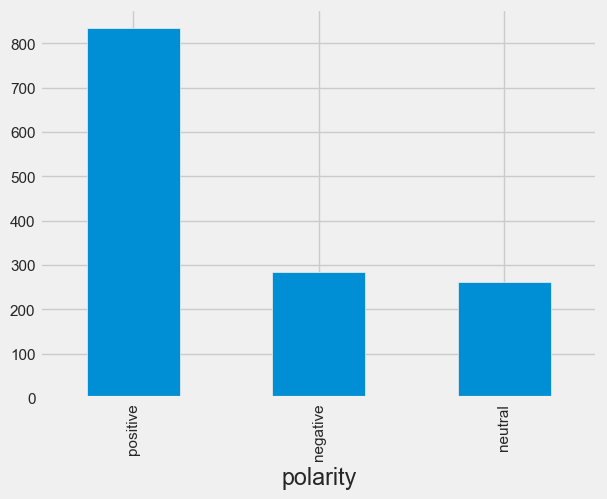

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')
s = pd.value_counts(data['polarity'])
ax = s.plot.bar()


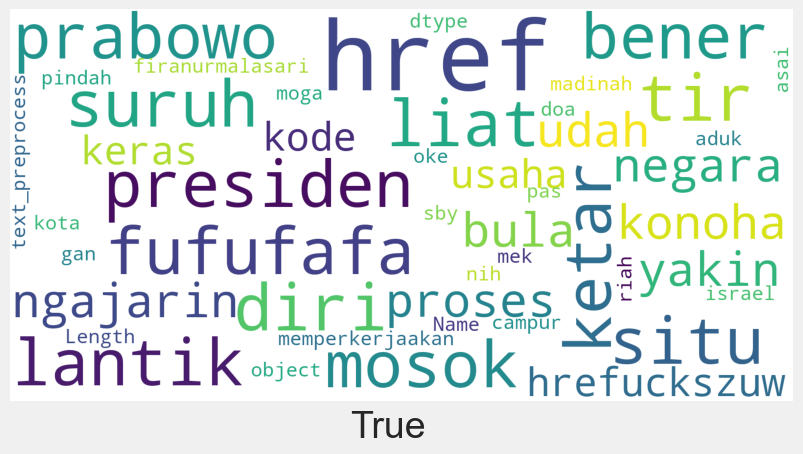

In [102]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')
def wordcloud(data, title = True):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words = 50,
        max_font_size = 49,
        scale = 4,
        random_state = 25
    ).generate(str(data))
    
    fig = plt.figure(5, figsize=(9,10))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=27)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(data['text_preprocess'])

In [103]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(data['text_clean'])  # Gunakan kolom yang sudah dibersihkan dan di-preprocess
y = data['polarity']


In [105]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Naive Bayes Accuracy: 0.68841
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.22      0.34        60
     neutral       0.62      0.33      0.43        48
    positive       0.69      0.96      0.80       168

    accuracy                           0.69       276
   macro avg       0.69      0.50      0.52       276
weighted avg       0.69      0.69      0.64       276



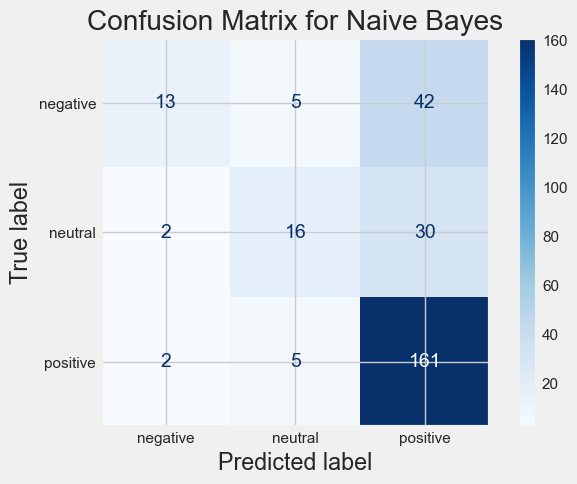

Logistic Regression Accuracy: 0.71739
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.33      0.46        60
     neutral       0.54      0.44      0.48        48
    positive       0.75      0.93      0.83       168

    accuracy                           0.72       276
   macro avg       0.68      0.57      0.59       276
weighted avg       0.71      0.72      0.69       276



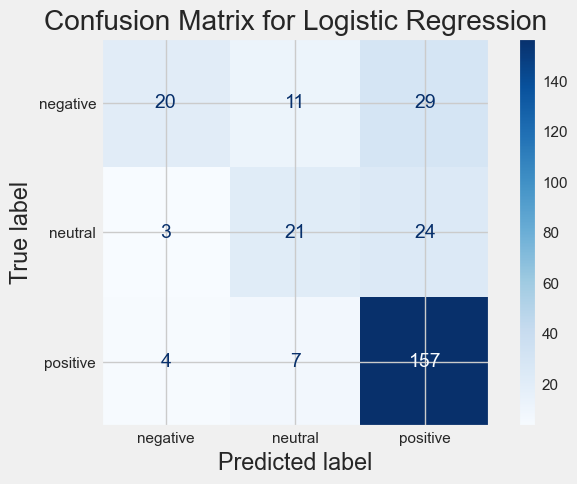

SVM Accuracy: 0.71014
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.23      0.37        60
     neutral       0.59      0.50      0.54        48
    positive       0.72      0.94      0.81       168

    accuracy                           0.71       276
   macro avg       0.75      0.56      0.58       276
weighted avg       0.74      0.71      0.67       276



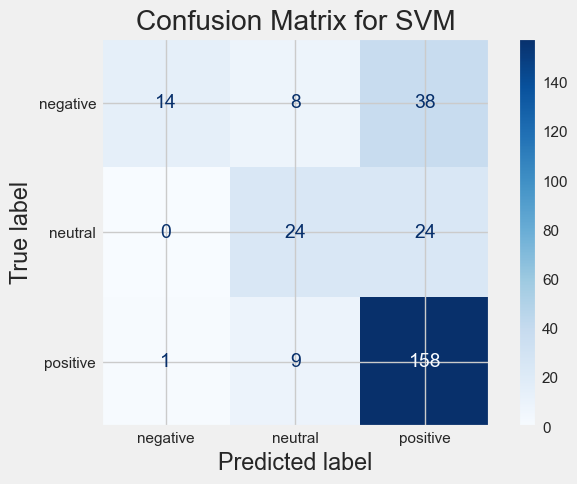

Random Forest Accuracy: 0.69203
Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.17      0.27        60
     neutral       0.46      0.75      0.57        48
    positive       0.79      0.86      0.82       168

    accuracy                           0.69       276
   macro avg       0.65      0.59      0.56       276
weighted avg       0.72      0.69      0.66       276



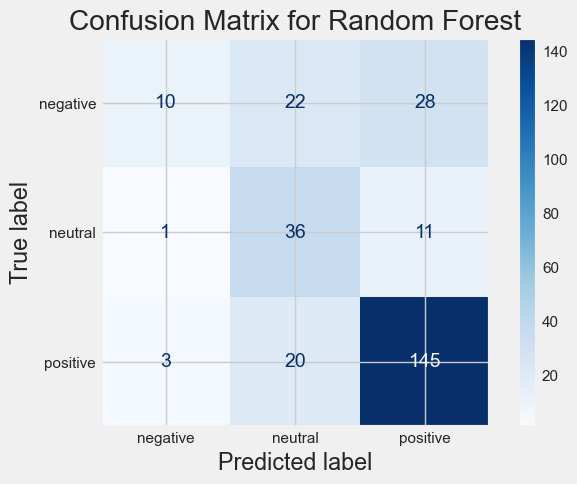

In [106]:
# Inisialisasi model
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dictionary untuk menyimpan akurasi
accuracy_results = {}

# Looping untuk melatih dan menguji setiap model
for model_name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)
    # Prediksi
    y_pred = model.predict(X_test)
    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.5f}")
    # Cetak classification report
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")
    
     # Hitung dan tampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


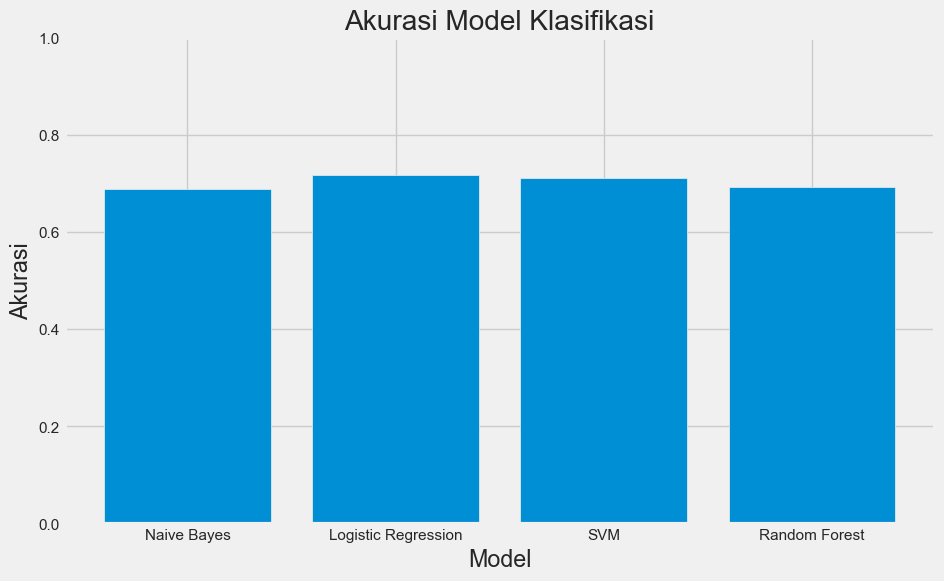

In [107]:
# Membuat bar plot untuk akurasi
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Akurasi Model Klasifikasi')
plt.ylim(0, 1)  # Menetapkan batas y dari 0 hingga 1
plt.show()